<a href="https://colab.research.google.com/github/romanowiczadam/data-sb/blob/master/kurs_datascience/05_DL_Podstawy/04_Tensorflow_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorflow Hub: tfhub.dev

Tensorflow Hub to biblioteka pozwalająca na wielokrotne i darmowe wykorzystywanie modułów modeli uczenia maszynowego. Tzw. transfer learning pozwala nam skorzystać z wcześniej wyuczonych modeli uczenia maszynowego na bardzo dużych zbiorach danych z zaawansowaną architekturą. Pozwala to zdecydowanie zaoszczędzic sporo czasu na dewelopowaniu własnych modeli, czy chociażby na mocy obliczeniowej wykorzystywaniej podczas trenowania

Przykłady użycia transfer learningu:

trenowanie modelu z małym zbiorem danych

pozwala poprawić generalizację modeli

przyśpiesza proces trenowania modeli

niski próg wejścia dla osób chcących poznać zastosowania modeli


In [1]:
import numpy as np
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt
print(f'Tensorflow version: {tf.__version__}')
print(f'Tensorflow Hub version: {hub.__version__}')

Tensorflow version: 2.2.0
Tensorflow Hub version: 0.8.0


In [0]:
# załadowanie modelu
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [4]:
# załadowanie etykiet
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels

16384/10484 [==============================================] - 0s 0us/step


array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [8]:
from google.colab import files
uploaded = files.upload()

In [12]:

filename = list(uploaded.keys())[0]
img = Image.open(filename).resize(IMAGE_SHAPE)
img

IndexError: ignored

In [11]:
# predykcja na podstawie modelu
img_arr = np.array(img) / 255.0
img_arr = np.expand_dims(img_arr, axis=0)
result = classifier.predict(img_arr)
predicted_class = np.argmax(result[0], axis=-1)
predicted_class_name = imagenet_labels[predicted_class]
predicted_class_name

'notebook'

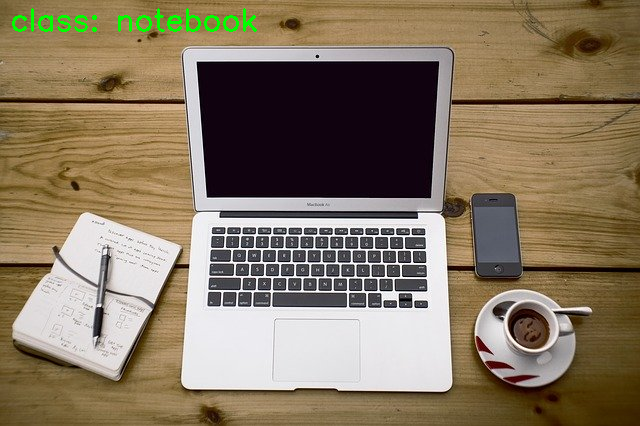

In [13]:
# wyswietlenie predykcji
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread(filename)
text = f'class: {predicted_class_name}'
img = cv2.putText(img=img, text=text, org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 255, 0), thickness=2)
cv2_imshow(img)